In [35]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow import saved_model
from tensorflow import keras
from PIL import Image

In [36]:
def image_to_array(image):
    arr = np.array(image)
    return arr

In [37]:
model = tf.keras.models.load_model('model.h5')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input2 (InputLayer)            [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 256, 256, 32  896         ['input1[0][0]']                 
                                )                                                           

In [38]:
# set the minimum and maximum  sst values for the plot
level_t = (np.arange(24, 30.5, 0.5)).tolist()
max_temp = 24
min_temp= 30
# set the number of levels for the plot
n_levels = 20

#chlorophyll-a values
min_chol = 1
max_chol=5
n_levels=20
level_c = np.arange(1, 6)

In [48]:
f1 = r"C:\Users\PC\deep learning project\temparature nc\AQUA_MODIS.20211227_20211231.L3m.8D.SST.x_sst.nc"
f2 = r"C:\Users\PC\deep learning project\chlorophyll nc\AQUA_MODIS.20211227_20211231.L3m.8D.CHL.x_chlor_a.nc"

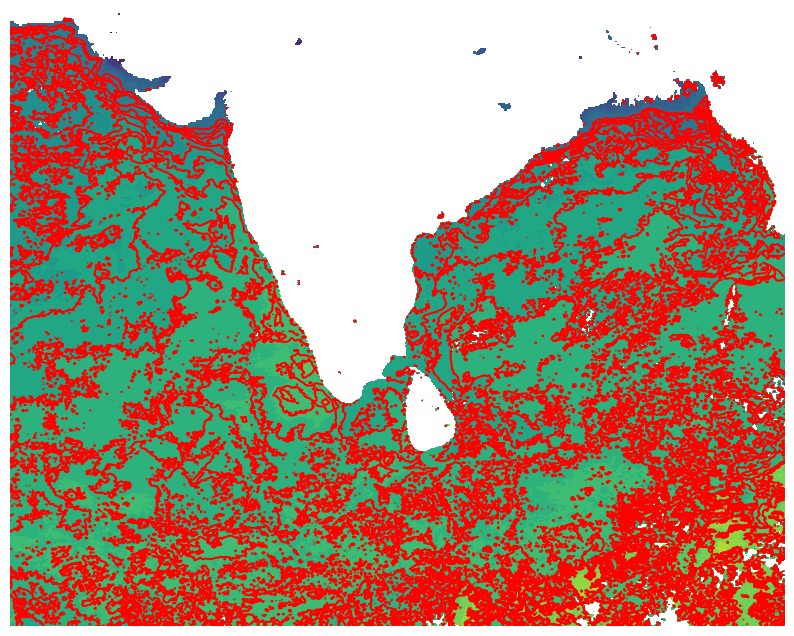

In [49]:
ds = xr.open_dataset(f1)
temp = ds['sst']

        # extract the longitude and latitude coordinates
lon = ds['lon']
lat = ds['lat']

        # create a continuous contour plot of the chlorophyll-a concentration data
levels = np.linspace(min_temp, max_temp, n_levels)
fig1, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(lon, lat, temp, levels=n_levels, cmap='viridis')
ax.contour(lon, lat, temp, levels=level_t, colors='red')
ax.axis('off')
fig1.savefig(r'fig1.png')

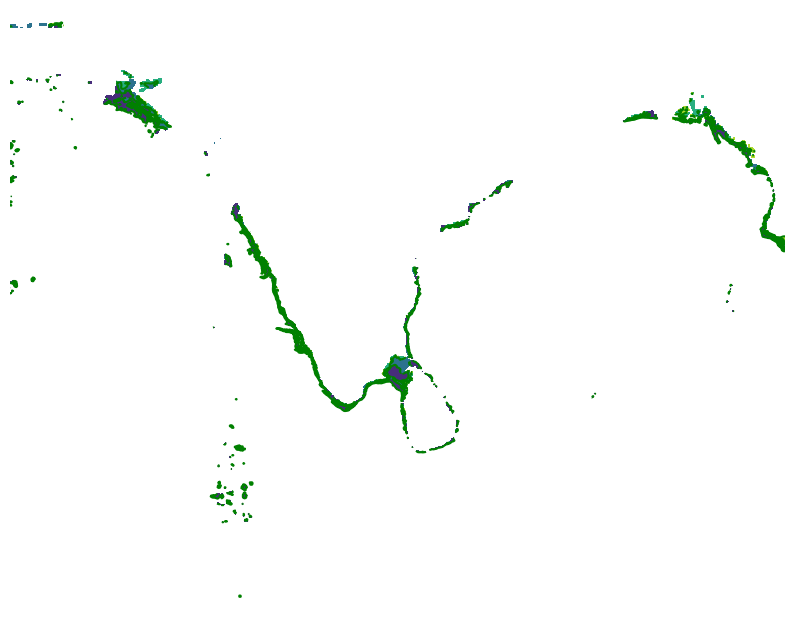

In [50]:
ds = xr.open_dataset(f2)
chol = ds['chlor_a']
lon = ds['lon']
lat = ds['lat']
levels = np.linspace(min_chol, max_chol, n_levels)
fig2, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(lon, lat, chol, levels=level_c, cmap='viridis')
ax.contour(lon, lat, chol, levels=level_c, colors='green')
ax.axis('off')
fig2.savefig(r'fig2.png')

In [51]:
#resize temp image
temp_image = Image.open(r'fig1.png')
chloro_image = Image.open(r'fig2.png')

temp_img = temp_image.resize((256, 256)) 
chloro_img = chloro_image.resize((256, 256))
print(temp_img.size)

(256, 256)


In [61]:
#convert to array
temp_array = image_to_array(temp_img)
temp_array = temp_array[:,:,:3]
temp_array = np.reshape(temp_array, (256, 256, 3))


chloro_array = image_to_array(chloro_img)

chloro_array = chloro_array[:,:,:3]
temp_array = np.reshape(temp_array, (256, 256, 3))

temp1 = np.expand_dims(temp_array, axis=0)
chloro1 = np.expand_dims(chloro_array, axis=0)

1/1 [==============================] - 0s 163ms/step


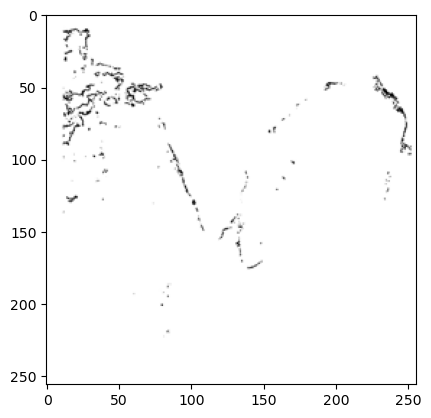

In [62]:
#image prediction
image_pred=model.predict([temp1, chloro1])
image_pred = np.squeeze(image_pred, axis=0)
plt.imshow(pred_image)
plt.show()